In [26]:
import pandas as pd 
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from scipy.interpolate import CubicSpline


In [27]:
bd_modificada = pd.read_excel("bd_modificada.xlsx") 
bd_respaldo = bd_modificada.copy()
bd_respaldo.to_excel("bd_respaldo.xlsx", index=False)

In [28]:


# Copiar la base de datos para no modificar la original
bd_interpolada = bd_modificada.copy()

# Extraer datos sin NaN para construir el spline
tiempo_no_nan = bd_interpolada["Tiempo"][bd_interpolada["Temperatura_Agua"].notna()]
temp_no_nan = bd_interpolada["Temperatura_Agua"].dropna()

# Ajustar un spline cúbico
spline = CubicSpline(tiempo_no_nan, temp_no_nan)

# Interpolar los valores faltantes
tiempo_nan = bd_interpolada["Tiempo"][bd_interpolada["Temperatura_Agua"].isna()]
bd_interpolada.loc[bd_interpolada["Temperatura_Agua"].isna(), "Temperatura_Agua"] = spline(tiempo_nan)

# Agregar los datos interpolados a la base modificada







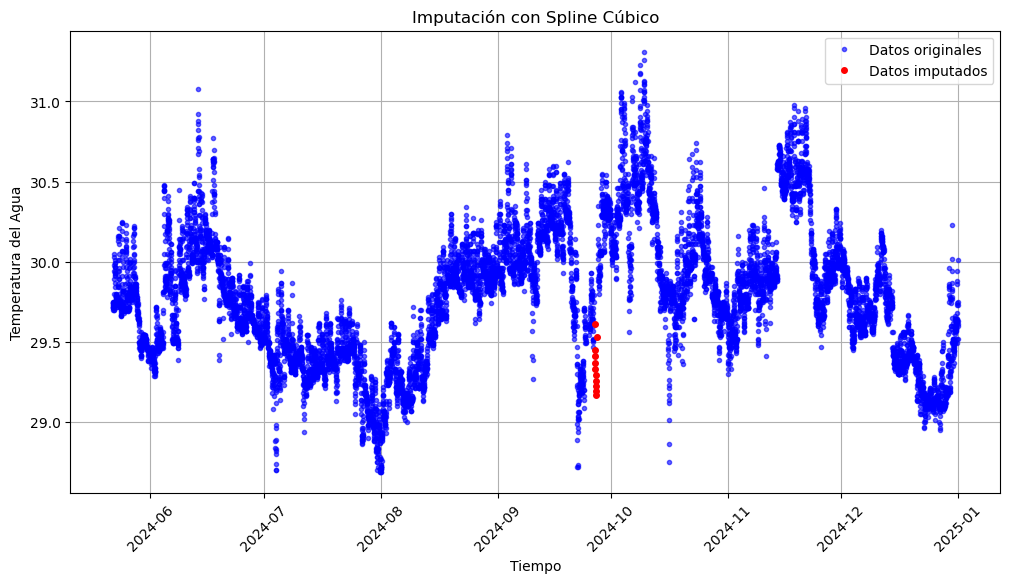

In [29]:
# Identificar los datos imputados
datos_imputados = bd_modificada["Temperatura_Agua"].isna()

# Graficar la serie de tiempo con datos originales y los imputados diferenciados
plt.figure(figsize=(12, 6))
plt.plot(bd_interpolada["Tiempo"], bd_interpolada["Temperatura_Agua"], 'o', markersize=3, label="Datos originales", alpha=0.6, color="blue")
plt.plot(bd_interpolada["Tiempo"][datos_imputados], bd_interpolada["Temperatura_Agua"][datos_imputados], 'o', markersize=4, label="Datos imputados", color="red")

plt.xlabel("Tiempo")
plt.ylabel("Temperatura del Agua")
plt.title("Imputación con Spline Cúbico")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()


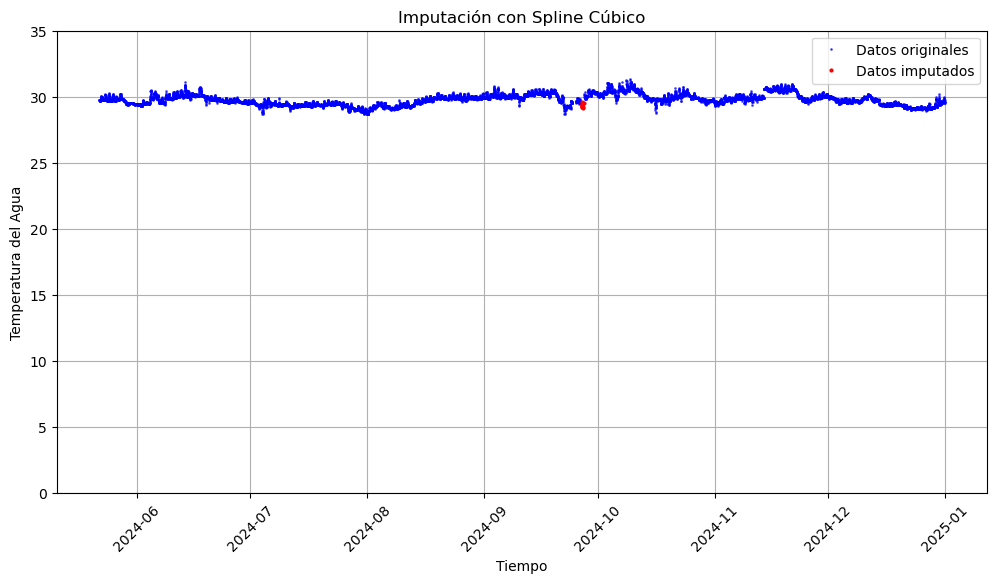

In [30]:
datos_imputados = bd_modificada["Temperatura_Agua"].isna()

# Graficar la serie de tiempo con datos originales y los imputados diferenciados
plt.figure(figsize=(12, 6))
plt.plot(bd_interpolada["Tiempo"], bd_interpolada["Temperatura_Agua"], 'o', markersize=1, label="Datos originales", alpha=0.6, color="blue")
plt.plot(bd_interpolada["Tiempo"][datos_imputados], bd_interpolada["Temperatura_Agua"][datos_imputados], 'o', markersize=2, label="Datos imputados", color="red")

plt.xlabel("Tiempo")
plt.ylabel("Temperatura del Agua")
plt.title("Imputación con Spline Cúbico")
plt.legend()
plt.xticks(rotation=45)
plt.ylim(0,35)
plt.grid()
plt.show()


In [ ]:
bd_modificada.loc[bd_modificada["Temperatura_Agua"].isna(), "Temperatura_Agua"] = bd_interpolada["Temperatura_Agua"]
